# NEXP2X FCR Comparative

## Importing packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import requests
import json

## Importing raw data

In [2]:
# Dataset for historical price of FCR privision per MW
raw_data_DK1 = pd.read_excel('Data/FCR/FcrReservesDK1.xlsx')
raw_data_DK2 = pd.read_excel('Data/FCR/FcrReservesDK2.xlsx')

# FCR DK1
AttributeNamesFCR_DK1  = list(raw_data_DK1.columns.values)
FCR_DK1 = raw_data_DK1[list( AttributeNamesFCR_DK1[i] for i in [1, 5, 9] )]

# FCR DK2
# AttributeNamesFCR_DK2  = list(raw_data_DK2.columns.values)
# FCR_DK2 = raw_data_DK2[list( AttributeNamesFCR_DK2[i] for i in [1, 3, 5] )]

In [3]:
headers_test = {'content-type': 'application/json'}

query_test = """ {
  fcrreservesdk2(order_by: {HourDK: desc}, where: {HourDK: {_gte: "2015-01-01T00:00:00"}}) {
    FCR_D_UpPriceDKK
    FCR_D_UpPriceEUR
    FCR_N_PriceDKK
    FCR_N_PriceEUR
    HourDK
    HourUTC
  }
}
"""

request_test = requests.post('https://data-api.energidataservice.dk/v1/graphql', json={'query': query_test}, headers=headers_test)
test_json = request_test.json()
raw_data_DK2 = pd.DataFrame(test_json['data']['fcrreservesdk2'])



In [4]:
# FCR DK2
AttributeNamesFCR_DK2  = list(raw_data_DK2.columns.values)
FCR_DK2 = raw_data_DK2[list( AttributeNamesFCR_DK2[i] for i in [1, 3, 4] )]
FCR_DK2

,FCR_D_UpPriceEUR,FCR_N_PriceEUR,HourDK
0,0.00,0.00,2022-08-03T23:00:00
1,0.00,0.00,2022-08-03T22:00:00
2,0.00,0.00,2022-08-03T21:00:00
3,0.00,0.00,2022-08-03T20:00:00
4,0.00,0.00,2022-08-03T19:00:00
...,...,...,...
66522,9.22,33.05,2015-01-01T04:00:00
66523,9.16,33.04,2015-01-01T03:00:00
66524,9.12,32.64,2015-01-01T02:00:00
66525,9.21,32.61,2015-01-01T01:00:00


## Data processing and indexing

In [5]:
# INDEX FCR_DK1
# Parsing dates in the correct format
FCR_DK1['HourDK'] = pd.to_datetime(FCR_DK1['HourDK'])
FCR_DK1.set_index('HourDK', inplace = True)   # inplace create an integer indexes
FCR_DK1.sort_index(ascending = False, inplace = True)
FCR_DK1.describe()

C:\Users\MARCOS~1\AppData\Local\Temp/ipykernel_3116/2744630698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FCR_DK1['HourDK'] = pd.to_datetime(FCR_DK1['HourDK'])


,FCR_DownPriceEUR,FCR_UpPriceEUR
count,70008.000000,70008.000000
mean,3.008262,26.555596
std,6.495315,27.172034
min,0.000000,0.000000
25%,1.209515,8.981354
50%,1.340000,19.969999
75%,1.746396,36.910000
max,114.940002,1998.439941


In [6]:
# INDEX FCR_DK2
# Parsing dates in the correct format
FCR_DK2['HourDK'] = pd.to_datetime(FCR_DK2['HourDK'])
FCR_DK2.set_index('HourDK', inplace = True)   # inplace create an integer indexes
FCR_DK2.sort_index(ascending = False, inplace = True)
FCR_DK2.describe()

C:\Users\MARCOS~1\AppData\Local\Temp/ipykernel_3116/2927097395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FCR_DK2['HourDK'] = pd.to_datetime(FCR_DK2['HourDK'])


,FCR_D_UpPriceEUR,FCR_N_PriceEUR
count,66527.000000,66527.000000
mean,18.716878,28.741376
std,21.391266,23.461030
min,0.000000,0.000000
25%,5.680000,13.900000
50%,10.670000,21.990000
75%,22.930000,35.460000
max,284.820000,377.370000


## Outlier detection

In [7]:
FCR_DK1_no_out = FCR_DK1.copy()
FCR_DK1_no_out.FCR_UpPriceEUR[FCR_DK1_no_out.FCR_UpPriceEUR >= 500] = FCR_DK1_no_out.FCR_UpPriceEUR.mean()

## Data Visualization - Lineplot

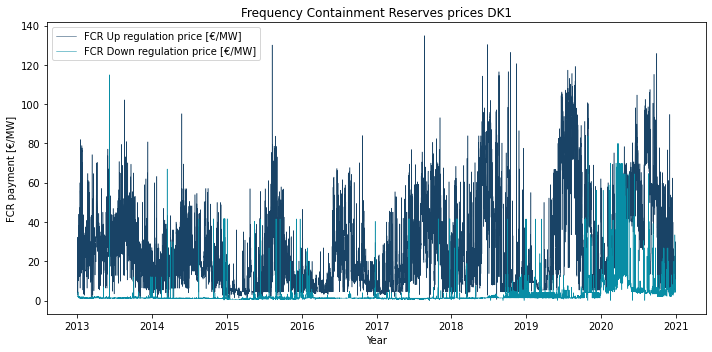

In [8]:
#%% LINEPLOT DK1
linewidth = 0.5
fig, ax = plt.subplots(figsize=(10 ,5))

fcr_up        = ax.plot(FCR_DK1_no_out.index , FCR_DK1_no_out.FCR_UpPriceEUR, linewidth = linewidth, color='#194366', label = 'FCR Up regulation price [€/MW]')
fcr_down_line = ax.plot(FCR_DK1_no_out.index , FCR_DK1_no_out.FCR_DownPriceEUR, linewidth = linewidth, color='#088da5', label = 'FCR Down regulation price [€/MW]')

plt.xlabel("Year")
plt.ylabel('FCR payment [€/MW]')
plt.title("Frequency Containment Reserves prices DK1")
  

plt.legend( )
plt.tight_layout()
plt.savefig('Figures/lineplot.png', dpi = 600)
plt.show()

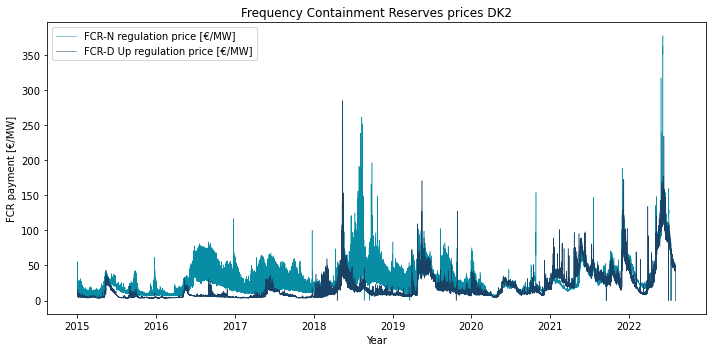

In [9]:
#%% LINEPLOT DK2
linewidth = 0.5
fig, ax = plt.subplots(figsize=(10 ,5))

fcrn_line = ax.plot(FCR_DK2.index , FCR_DK2.FCR_N_PriceEUR, linewidth = linewidth, color='#088da5', label = 'FCR-N regulation price [€/MW]')
fcrd_line = ax.plot(FCR_DK2.index , FCR_DK2.FCR_D_UpPriceEUR, linewidth = linewidth, color='#194366', label = 'FCR-D Up regulation price [€/MW]')

plt.xlabel("Year")
plt.ylabel('FCR payment [€/MW]')
plt.title("Frequency Containment Reserves prices DK2")
  

plt.legend( )
plt.tight_layout()
plt.savefig('Figures/lineplot.png', dpi = 600)
plt.show()

## Data Visualization - Cumulative payment

C:\Users\MARCOS~1\AppData\Local\Temp/ipykernel_3116/3150331145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FCR_DK1['year'] = FCR_DK1.index.year
C:\Users\MARCOS~1\AppData\Local\Temp/ipykernel_3116/3150331145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FCR_DK2['year'] = FCR_DK2.index.year


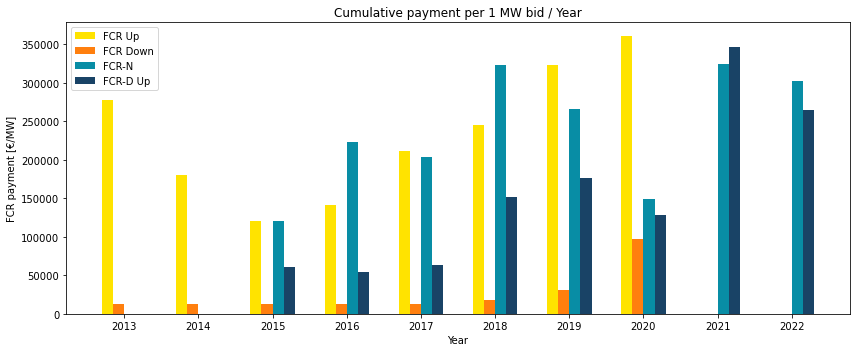

In [10]:
#%% CUMULATIVE PAYMENT
FCR_DK1['year'] = FCR_DK1.index.year
FCR_DK2['year'] = FCR_DK2.index.year

year_FCR_DK1 = FCR_DK1.groupby(by = 'year').sum()
year_FCR_DK2 = FCR_DK2.groupby(by = 'year').sum()


N = len(year_FCR_DK1.columns)
ind = np.arange(N) 
width = 0.15
space = 2 * width


fig, ax = plt.subplots(figsize=(12,5))

bar_FCR_Up   = ax.bar(year_FCR_DK1.index - 0.75 * space, year_FCR_DK1.FCR_UpPriceEUR, width, color='#FFE300')
bar_FCR_Down = ax.bar(year_FCR_DK1.index - 0.25 * space,   year_FCR_DK1.FCR_DownPriceEUR, width, color='tab:orange')

bar_FCRN = ax.bar(year_FCR_DK2.index +0.25 * space, year_FCR_DK2.FCR_N_PriceEUR,   width, color='#088da5')
bar_FCRD = ax.bar(year_FCR_DK2.index +0.75 * space, year_FCR_DK2.FCR_D_UpPriceEUR, width, color='#194366')
     
    
plt.xlabel("Year")
plt.ylabel('FCR payment [€/MW]')
plt.title("Cumulative payment per 1 MW bid / Year")
  

plt.xticks(np.arange(2013, 2023, 1) )


plt.legend( (bar_FCR_Up, bar_FCR_Down, bar_FCRN, bar_FCRD), ('FCR Up', 'FCR Down', 'FCR-N', 'FCR-D Up') )
plt.tight_layout()
plt.savefig('Figures/barchart.png', dpi = 600)
plt.show()

## Pivot Visulaization DK2


In [11]:
FCR_DK2['month'] = FCR_DK2.index.month
FCR_DK2['week']  = FCR_DK2.index.week
FCR_DK2['weekday'] = FCR_DK2.index.weekday
FCR_DK2['day']   = FCR_DK2.index.day
FCR_DK2['hour']  = FCR_DK2.index.hour
FCR_DK2.head()

C:\Users\MARCOS~1\AppData\Local\Temp/ipykernel_3116/1491782974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FCR_DK2['month'] = FCR_DK2.index.month
C:\Users\MARCOS~1\AppData\Local\Temp/ipykernel_3116/1491782974.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  FCR_DK2['week']  = FCR_DK2.index.week
C:\Users\MARCOS~1\AppData\Local\Temp/ipykernel_3116/1491782974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,FCR_D_UpPriceEUR,FCR_N_PriceEUR,year,month,week,weekday,day,hour
HourDK,,,,,,,,
2022-08-03 23:00:00,0.0,0.0,2022,8,31,2,3,23
2022-08-03 22:00:00,0.0,0.0,2022,8,31,2,3,22
2022-08-03 21:00:00,0.0,0.0,2022,8,31,2,3,21
2022-08-03 20:00:00,0.0,0.0,2022,8,31,2,3,20
2022-08-03 19:00:00,0.0,0.0,2022,8,31,2,3,19


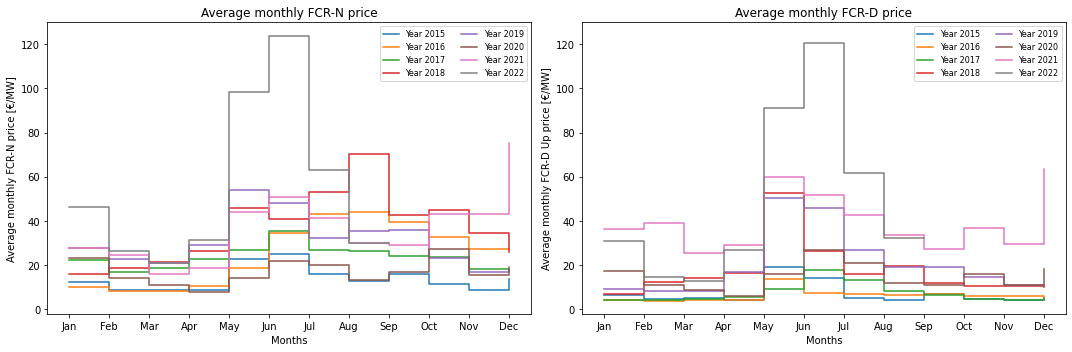

In [12]:
pivot_month_FRCN = FCR_DK2.pivot_table(index='year', columns='month', values='FCR_N_PriceEUR')
pivot_month_FRCD = FCR_DK2.pivot_table(index='year', columns='month', values='FCR_D_UpPriceEUR')

#import matplotlib.colors
#cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", [ '#194366',"#088da5", '#ffe300'])
#sns.heatmap(pivot_month, cmap='viridis')
months = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, (axN, axD) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize = (15, 5))
for i in range(len(pivot_month_FRCN)):
    axN.step(months, pivot_month_FRCN.iloc[i,:], label = 'Year ' + str(pivot_month_FRCN.index[i]), where ='post')
    axD.step(months, pivot_month_FRCD.iloc[i,:], label = 'Year ' + str(pivot_month_FRCD.index[i]), where ='post')
axN.legend(ncol = 2, fontsize = 8)
axN.set_xlabel('Months')
axN.set_ylabel('Average monthly FCR-N price [€/MW]')
axN.set_title('Average monthly FCR-N price')
axD.legend(ncol = 2, fontsize = 8)
axD.set_xlabel('Months')
axD.set_ylabel('Average monthly FCR-D Up price [€/MW]')
axD.yaxis.set_tick_params(labelbottom=True)
axD.set_title('Average monthly FCR-D price')
plt.tight_layout()
plt.savefig('Figures/pivot_month.png', dpi = 600)
plt.show()

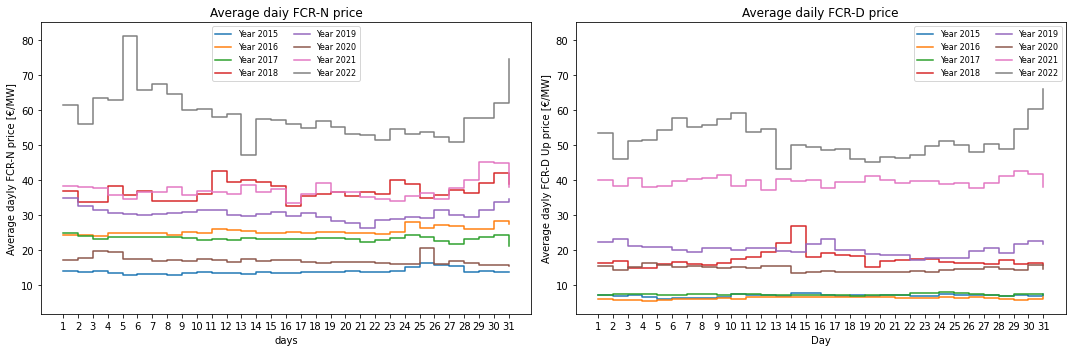

In [13]:
#%% PIVOT DAY
pivot_day_FRCN = FCR_DK2.pivot_table(index='year', columns='day', values='FCR_N_PriceEUR')
pivot_day_FRCD = FCR_DK2.pivot_table(index='year', columns='day', values='FCR_D_UpPriceEUR')

fig, (axN, axD) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize = (15, 5))
for i in range(len(pivot_day_FRCN)):
    axN.step(range(31), pivot_day_FRCN.iloc[i,:], label = 'Year ' + str(pivot_day_FRCN.index[i]), where ='post')
    axD.step(range(31), pivot_day_FRCD.iloc[i,:], label = 'Year ' + str(pivot_day_FRCD.index[i]), where ='post')
axN.legend(ncol = 2, fontsize = 8)
axN.set_xlabel('days')
axN.set_ylabel('Average dayly FCR-N price [€/MW]')
axN.set_title('Average daiy FCR-N price')
axD.legend(ncol = 2, fontsize = 8)
axD.set_xlabel('Day')
axD.set_ylabel('Average dayly FCR-D Up price [€/MW]')
axD.set_title('Average daily FCR-D price')
axD.yaxis.set_tick_params(labelbottom=True)

# Setting the xlabel ticks for the FCRD plot
axD.set_xticks(range(31))
labels = np.arange(1, 32)
axD.set_xticklabels(labels)

# Setting the xlabel ticks for the FCRN plot
axN.set_xticks(range(31))
labels = np.arange(1, 32)
axN.set_xticklabels(labels)
plt.savefig('Figures/pivot_hour.png', dpi = 600)
plt.tight_layout()
plt.show()

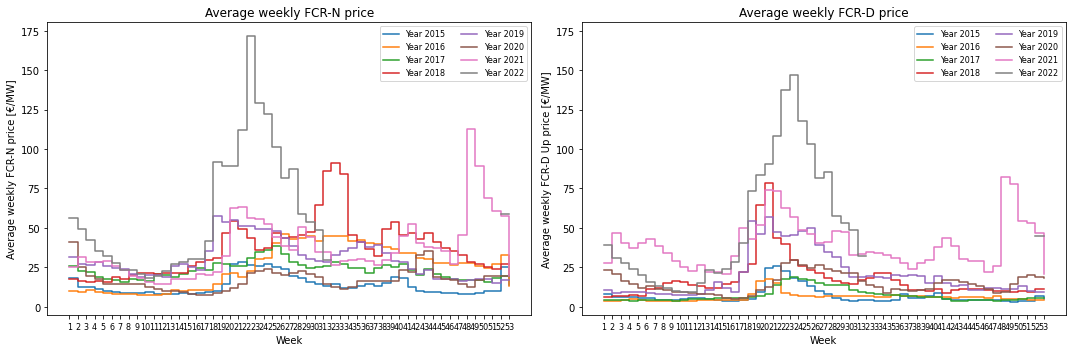

In [14]:
#%% PIVOT WEEK
pivot_week_FRCN = FCR_DK2.pivot_table(index='year', columns='week', values='FCR_N_PriceEUR')
pivot_week_FRCD = FCR_DK2.pivot_table(index='year', columns='week', values='FCR_D_UpPriceEUR')

fig, (axN, axD) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize = (15, 5))
for i in range(len(pivot_week_FRCN)):
    axN.step(range(53), pivot_week_FRCN.iloc[i,:], label = 'Year ' + str(pivot_week_FRCN.index[i]), where ='post')
    axD.step(range(53), pivot_week_FRCD.iloc[i,:], label = 'Year ' + str(pivot_week_FRCD.index[i]), where ='post')
axN.legend(ncol = 2, fontsize = 8)
axN.set_xlabel('Week')
axN.set_ylabel('Average weekly FCR-N price [€/MW]')
axN.set_title('Average weekly FCR-N price')

axD.legend(ncol = 2, fontsize = 8)
axD.set_xlabel('Week')
axD.set_ylabel('Average weekly FCR-D Up price [€/MW]')
axD.yaxis.set_tick_params(labelbottom=True)
axD.set_title('Average weekly FCR-D price')

# Setting the xlabel ticks for the FCRD plot
axD.set_xticks(range(0, 53))
labels = np.arange(1, 54)
axD.set_xticklabels(labels, fontsize = 8)

# # Setting the xlabel ticks for the FCRN plot
axN.set_xticks(range(0, 53))
labels = np.arange(1, 54)
axN.set_xticklabels(labels, fontsize = 8)

plt.savefig('Figures/pivot_hour.png', dpi = 600)
plt.tight_layout()
plt.show()

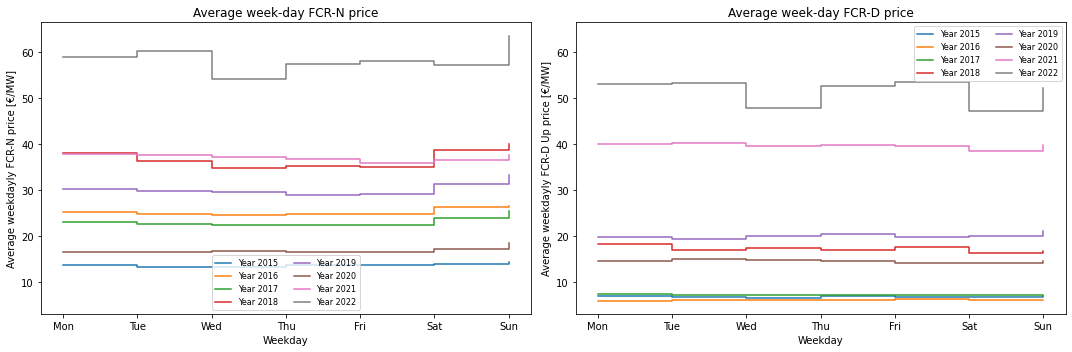

In [15]:
#%% PIVOT weekdayDAY
pivot_weekday_FRCN = FCR_DK2.pivot_table(index='year', columns='weekday', values='FCR_N_PriceEUR')
pivot_weekday_FRCD = FCR_DK2.pivot_table(index='year', columns='weekday', values='FCR_D_UpPriceEUR')

fig, (axN, axD) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize = (15, 5))

weedays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(len(pivot_weekday_FRCN)):
    axN.step(weedays, pivot_weekday_FRCN.iloc[i,:], label = 'Year ' + str(pivot_weekday_FRCN.index[i]), where ='post')
    axD.step(weedays, pivot_weekday_FRCD.iloc[i,:], label = 'Year ' + str(pivot_weekday_FRCD.index[i]), where ='post')
axN.legend(ncol = 2, fontsize = 8)
axN.set_xlabel('Weekday')
axN.set_ylabel('Average weekdayly FCR-N price [€/MW]')
axN.set_title('Average week-day FCR-N price')
axD.legend(ncol = 2, fontsize = 8)
axD.set_xlabel('Weekday')
axD.set_ylabel('Average weekdayly FCR-D Up price [€/MW]')
axD.yaxis.set_tick_params(labelbottom=True)
axD.set_title('Average week-day FCR-D price')

plt.savefig('Figures/pivot_weekday.png', dpi = 600)
plt.tight_layout()
plt.show()

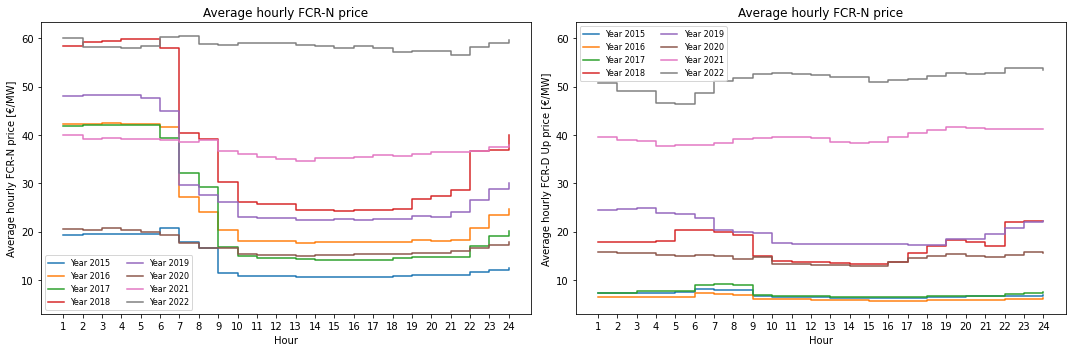

In [16]:
#%% PIVOT HOUR

# Defining pivot values
pivot_hour_FRCN = FCR_DK2.pivot_table(index='year', columns='hour', values='FCR_N_PriceEUR')
pivot_hour_FRCD = FCR_DK2.pivot_table(index='year', columns='hour', values='FCR_D_UpPriceEUR')

# Creating subplots
fig, (axN, axD) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize = (15, 5))
for i in range(len(pivot_hour_FRCN)):
    axN.step(range(24), pivot_hour_FRCN.iloc[i,:], label = 'Year ' + str(pivot_hour_FRCN.index[i]), where ='post')
    axD.step(range(24), pivot_hour_FRCD.iloc[i,:], label = 'Year ' + str(pivot_hour_FRCD.index[i]), where ='post')

# Legend settings
axN.legend(ncol = 2, fontsize = 8)
axN.set_xlabel('Hour')
axN.set_ylabel('Average hourly FCR-N price [€/MW]')
axN.set_title('Average hourly FCR-N price')

axD.legend(ncol = 2, fontsize = 8)
axD.set_xlabel('Hour')
axD.set_ylabel('Average hourly FCR-D Up price [€/MW]')
axD.yaxis.set_tick_params(labelbottom=True)
axD.set_title('Average hourly FCR-N price')
# Setting the xlabel ticks for the FCRD plot


axD.set_xticks(range(24))
labels = np.arange(1, 25)
axD.set_xticklabels(labels)

# Setting the xlabel ticks for the FCRN plot
axN.set_xticks(range(24))
labels = np.arange(1, 25)
axN.set_xticklabels(labels)
plt.savefig('Figures/pivot_hour.png', dpi = 600)
plt.tight_layout()
plt.show()
